In [1]:
import warnings as wr
wr.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny
import seaborn as sns

In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns={"CustomerID":"customer_id","Gender":"gender","Age":"age","Annual Income (k$)":"income","Spending Score (1-100)":"score"},inplace=True)

In [6]:
df

,customer_id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


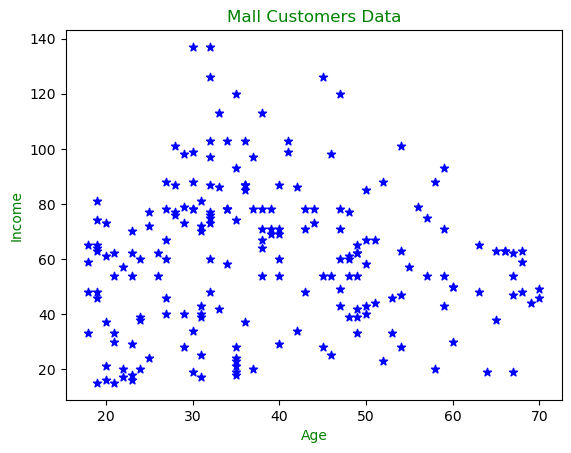

In [7]:
plt.scatter(df.age,df.income,color = "blue",marker= "*")
plt.title("Mall Customers Data",color = "green")
plt.xlabel("Age",color = "green")
plt.ylabel("Income",color = "green")
plt.savefig("img_01.png")

<Figure size 1000x1500 with 0 Axes>

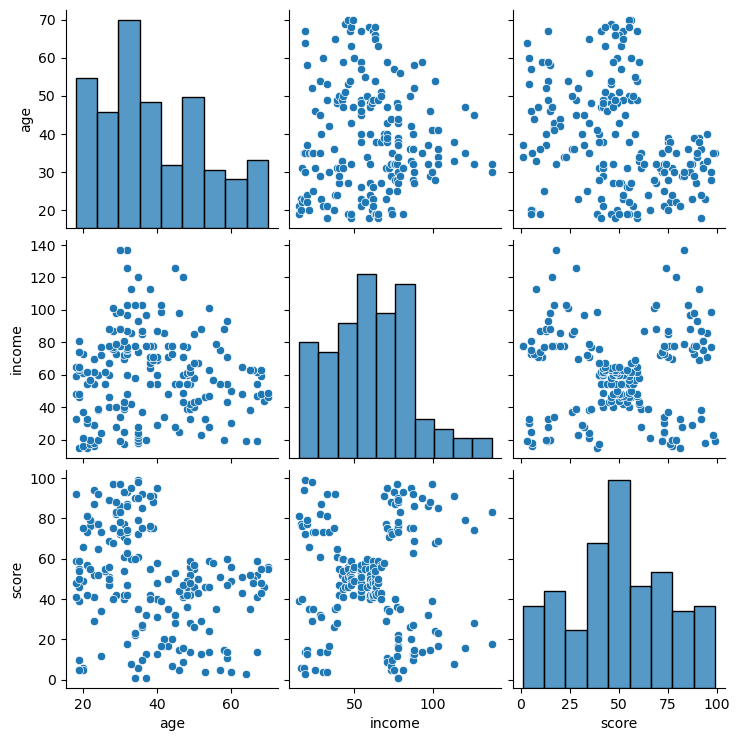

In [8]:
plt.figure(figsize=(10,15))
sns.pairplot(df[["age","income","score"]])
plt.savefig("img_02")

In [9]:
import sklearn.cluster as cluster

In [10]:
wcss = []
for k in range(1,15):
    km = cluster.KMeans(n_clusters=k)
    km.fit_predict(df[["age","income"]])
    wcss.append(km.inertia_)

In [11]:
wcss

[176108.78000000003,
 87121.56591478697,
 59486.96143928036,
 39529.88796736351,
 32777.08042973287,
 25399.02200441698,
 21971.22062157075,
 18901.18551295551,
 16128.43204602415,
 13686.48276960323,
 12199.464320220839,
 11253.785436785438,
 10131.27871908793,
 9056.713183253942]

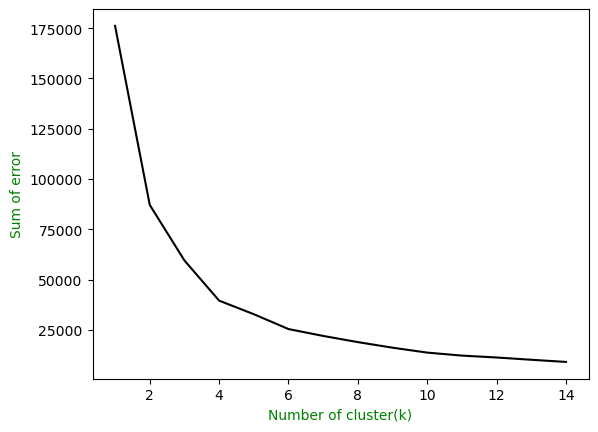

In [12]:
plt.plot(range(1,15),wcss,color = "black")
plt.xlabel("Number of cluster(k)",color = "green")
plt.ylabel("Sum of error",color = "green")
plt.savefig("ing_03.png")

In [13]:
from kneed import KneeLocator

In [14]:
kn = KneeLocator(range(1,15),wcss,curve="convex",direction="decreasing")

In [15]:
kn.knee

4

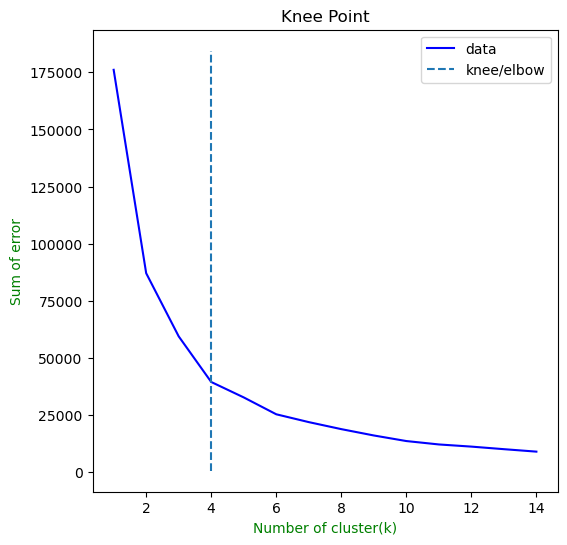

In [16]:
kn.plot_knee()
plt.xlabel("Number of cluster(k)",color = "green")
plt.ylabel("Sum of error",color = "green")
plt.savefig("ing_04.png")

In [17]:
kmeans = cluster.KMeans(n_clusters=4)

In [18]:
cluster1 =  kmeans.fit_predict(df[["age","income"]])

In [19]:
df["cluster1"]= cluster1

In [20]:
df

,customer_id,gender,age,income,score,cluster1
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,3


In [21]:
center = kmeans.cluster_centers_

In [22]:
center

array([[ 55.81481481,  51.77777778],
       [ 31.95890411,  72.95890411],
       [ 30.34693878,  29.26530612],
       [ 39.        , 106.5       ]])

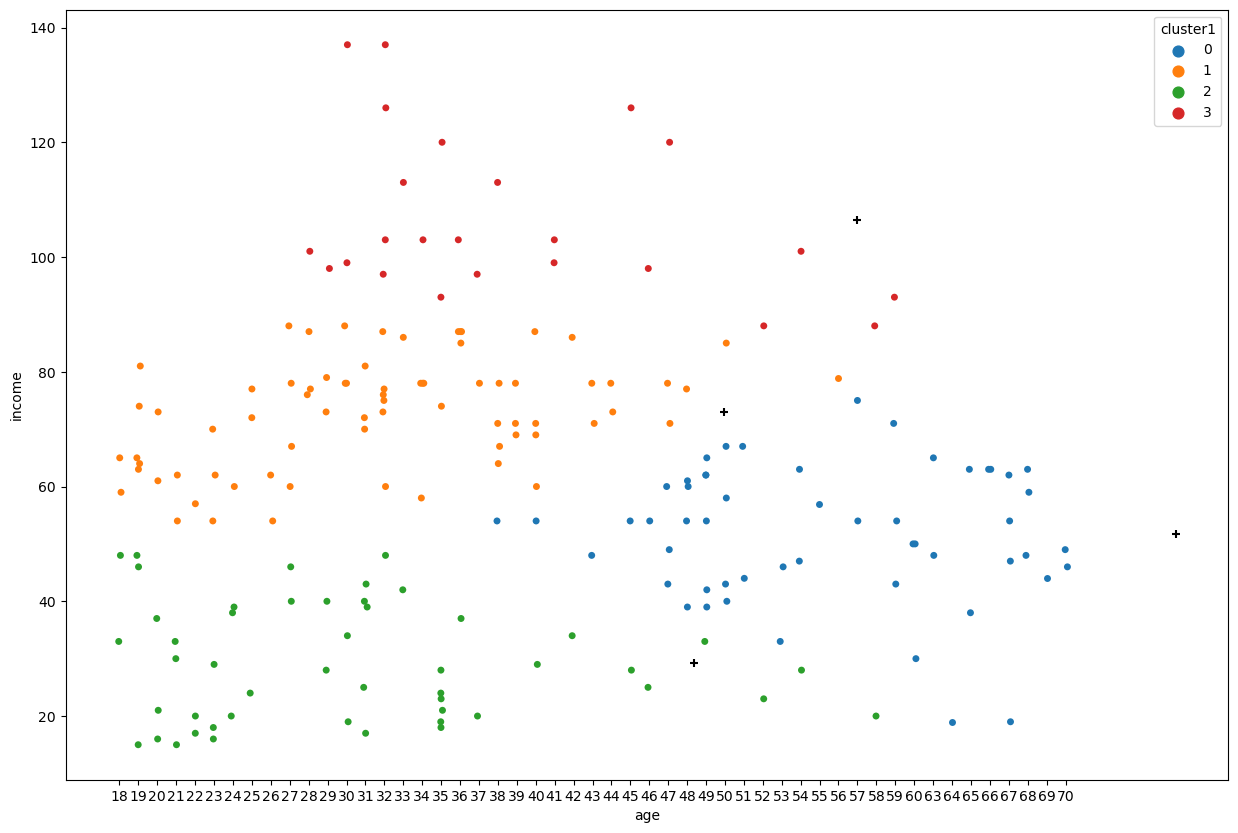

In [26]:
plt.figure(figsize=(15,10))
sns.stripplot(x= "age",y="income",hue="cluster1",data=df)
plt.scatter(center[:,0],center[:,1],color = "black",marker="+")
plt.savefig("img_05.png")

In [29]:
kmeans.predict([[30,100]])

array([3])

In [30]:
import pickle as pk

In [31]:
pk.dump(kmeans,open("KMeans_01","wb"))

In [33]:
pk.load(open("KMeans_01","rb"))

KMeans(n_clusters=4)

In [34]:
x = kmeans.predict([[30,100]])

In [35]:
x

array([3])